# SNF example using R

In this example script we will go through the different steps to carry out the similarity network fusion analysis. This will also work to compare with the python implementation. Steps

1. Calculate the distance matrix for metabolites (Euclidean distance) and SNPs (Chi2 distance)
2. Generate the affinity matrix out of the distance matrices
3. Apply the SNF iterative process

In [110]:
#### LIBRARIES
library(igraph)
library(SNFtool)

In [3]:
#### SET PATHS
setwd('../')
mainpath <- getwd()
datapath <- paste0(mainpath, '/Data')

In [12]:
#### LOAD DATA
setwd(datapath)
dat <- read.csv('MFA_data.txt', sep = '\t')
dat

,snp1,snp2,snp3,snp4,snp5,snp6,status,Met1,Met2,Met3,Met4,Met5,Met6,Met7
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AG,GG,GG,GG,AG,GG,control,19.11573,24.79924,27.515510,18.720287,17.537699,7.985089,17.269974
2,GG,GG,AA,AG,AA,AA,control,17.88117,33.28019,23.602213,18.634412,26.336851,14.980349,26.566395
3,AG,AG,GG,AA,AA,GG,control,14.63651,21.46903,8.892394,34.586894,25.074224,25.075590,17.695359
4,AG,AA,AA,AA,AG,AA,control,20.85908,18.65394,13.926668,13.942551,14.533406,21.602728,18.705230
5,AA,GG,AA,AG,GG,GG,control,21.47882,22.53377,13.945255,26.942080,11.095887,22.379987,14.133174
6,AA,AA,AA,GG,AA,AA,control,12.28264,21.71357,26.547907,24.699619,16.448431,11.375599,20.703002
7,AG,AA,GG,AA,GG,AA,control,17.91016,23.17385,34.634938,25.256526,13.755048,22.490327,15.557572
8,GG,GG,AA,GG,AA,AA,control,17.45185,11.53973,21.731587,16.571383,14.528870,25.834259,16.728825
9,AA,GG,AA,AG,AG,AA,control,20.85102,16.87717,27.125978,13.639804,19.603526,24.340940,18.654625


In [35]:
#### SPLIT DATA 
snp <- dat[,1:6]
met <- dat[,8:14]
met_norm <- standardNormalization(met) #normalize continuous

In [133]:
#### RECODE SNP DATA
snp_rec <- snp
snp_rec[snp_rec == 'AA'] <- 0.0
snp_rec[snp_rec == 'AG'] <- 1.0
snp_rec[snp_rec == 'GG'] <- 2.0
snp_rec <- mapply(snp_rec, FUN=as.numeric)

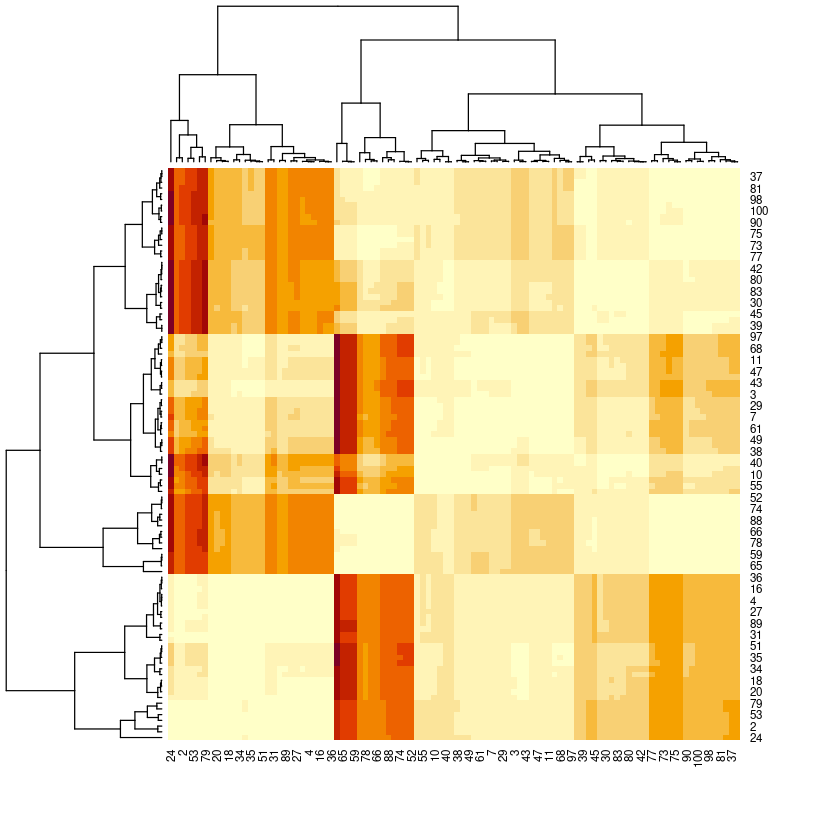

In [173]:
snp_pca <- prcomp(snp_rec)
snp_pca_dist <- dist2(as.matrix(snp_pca$x[,1]), as.matrix(snp_pca$x[,1]))
heatmap(snp_pca_dist)

In [134]:
#### CALCULATE DISTANCES
met_dist <- dist2(as.matrix(met_norm), as.matrix(met_norm))
snp_dist <- chiDist2(snp_rec)
dimn <- dimnames(met_dist)
dimnames(snp_dist) <- dimn

In [135]:
met_dist

,1,2,3,4,5,6,7,8,9,10,⋯,91,92,93,94,95,96,97,98,99,100
1,0.000000,4.476812,1.436262e+01,5.833971e+00,8.0998862,1.349183,6.9449849,9.0551656,7.9488359,13.908708,⋯,9.491029,21.22358,9.322308,25.48979,21.39622,30.30825,12.504606,24.73663,21.639535,23.54816
2,4.476812,0.000000,9.565387e+00,5.700164e+00,10.4148197,3.787377,7.8664544,8.0733418,5.0877545,4.860394,⋯,5.684236,14.72587,9.380420,18.78784,19.44093,25.89682,13.586454,14.55241,18.383555,16.68329
3,14.362622,9.565387,3.552714e-15,1.123912e+01,5.5723580,8.878664,4.9162705,8.9483127,9.7280633,9.815648,⋯,15.417668,18.60322,16.187749,31.98041,19.91137,24.31027,13.703551,13.20948,14.414193,24.30314
4,5.833971,5.700164,1.123912e+01,1.776357e-15,4.0511555,5.523240,3.0378932,0.7740592,0.8049211,4.674611,⋯,5.647493,17.72547,9.489043,37.88077,16.36093,40.49155,13.712876,24.00803,14.046512,26.80762
5,8.099886,10.414820,5.572358e+00,4.051155e+00,0.0000000,4.949936,0.4689119,2.9772666,5.5908226,10.491414,⋯,10.497197,20.18163,11.627922,40.81845,16.75648,35.59793,11.395952,21.55180,10.889222,29.67987
6,1.349183,3.787377,8.878664e+00,5.523240e+00,4.9499357,0.000000,4.0670329,7.4844204,7.4387026,11.373524,⋯,8.536180,20.65061,10.602239,27.08300,21.65219,29.97330,12.680138,20.47004,17.657456,23.50171
7,6.944985,7.866454,4.916270e+00,3.037893e+00,0.4689119,4.067033,0.0000000,2.0255471,3.7357280,7.746402,⋯,7.709360,16.14458,9.080348,36.92249,13.80331,32.65713,9.787094,18.20927,8.904216,23.82514
8,9.055166,8.073342,8.948313e+00,7.740592e-01,2.9772666,7.484420,2.0255471,0.0000000,0.8612223,4.501807,⋯,7.130851,17.27523,10.789631,42.65519,15.11526,41.29870,13.821177,23.42580,11.876085,27.32944
9,7.948836,5.087754,9.728063e+00,8.049211e-01,5.5908226,7.438703,3.7357280,0.8612223,0.0000000,2.518224,⋯,5.285674,13.84371,8.648380,35.23618,13.56136,36.49287,12.654143,20.42098,12.949898,22.10818
10,13.908708,4.860394,9.815648e+00,4.674611e+00,10.4914143,11.373524,7.7464023,4.5018071,2.5182236,0.000000,⋯,5.387645,13.60549,12.284049,32.74090,16.91460,37.08815,17.491316,15.36514,13.132024,20.52672


In [60]:
snp_dist

,1,2,3,4,5,6,7,8,9,10,⋯,91,92,93,94,95,96,97,98,99,100
1,0.000000,5.682229,2.926824,4.1192917,4.015028,5.262263,4.428050,4.602607,3.752895,5.598616,⋯,4.086019,3.690364,2.111877,4.698537,4.651913,2.033847,4.651913,5.914838,0.9015595,3.7862942
2,5.682229,0.000000,5.289858,5.2248416,3.167201,3.822611,5.749417,1.079622,2.596001,3.807525,⋯,4.378261,2.825199,4.403686,4.184812,4.231436,5.148382,4.231436,4.025344,5.7065958,5.0044622
3,2.926824,5.289858,0.000000,4.4678033,4.477358,4.971891,3.189260,5.087429,5.802526,5.329612,⋯,5.425542,5.029887,3.451400,1.771713,1.725089,3.373370,1.725089,4.768641,2.0252648,3.5172897
4,4.119292,5.224842,4.467803,0.0000000,5.454008,2.946090,2.111877,5.022412,3.295507,6.120421,⋯,5.383018,5.913288,4.428050,4.343149,4.389773,6.153139,4.389773,5.536957,3.2177323,5.2340246
5,4.015028,3.167201,4.477358,5.4540083,0.000000,4.239812,5.145250,4.246823,2.158501,5.286692,⋯,3.107428,4.304365,1.903152,4.602012,2.752269,1.981182,2.752269,1.899810,4.0393949,3.7336289
6,5.262263,3.822611,4.971891,2.9460901,4.239812,0.000000,3.470665,2.742989,3.668612,4.695698,⋯,3.291628,4.488566,3.983719,3.200178,3.246802,4.061749,3.246802,4.322761,6.1638224,3.1426354
7,4.428050,5.749417,3.189260,2.1118769,5.145250,3.470665,0.000000,5.546988,5.407384,4.934470,⋯,4.197067,3.801411,4.119292,3.064605,4.914349,4.041262,4.914349,5.228199,3.5264903,3.1221477
8,4.602607,1.079622,5.087429,5.0224125,4.246823,2.742989,5.546988,0.000000,3.675623,2.727903,⋯,3.298639,1.745577,3.324064,3.982382,4.029007,4.068760,4.029007,5.104966,5.5041666,3.9248401
9,3.752895,2.596001,5.802526,3.2955071,2.158501,3.668612,5.407384,3.675623,0.000000,5.548825,⋯,3.369562,4.566499,4.061653,4.030813,4.077437,4.139683,4.077437,3.016644,3.7772612,3.9957626
10,5.598616,3.807525,5.329612,6.1204206,5.286692,4.695698,4.934470,2.727903,5.548825,0.000000,⋯,2.179264,1.908252,4.363932,4.224565,5.148382,4.231436,5.148382,4.536307,6.5001756,2.4789886


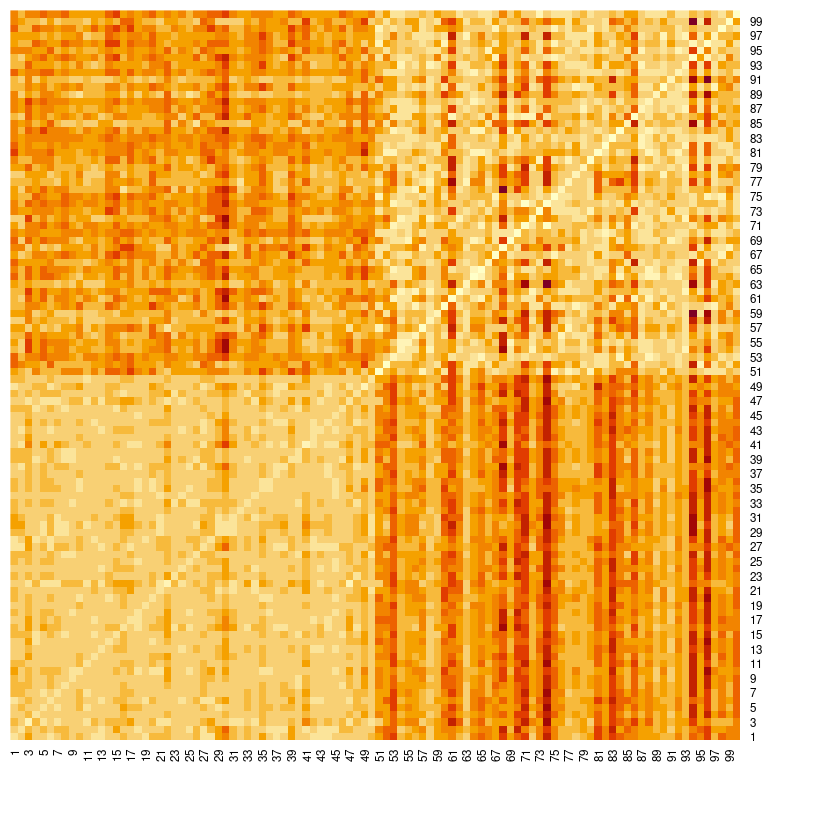

In [137]:
heatmap(met_dist, Rowv = NA, Colv = NA)

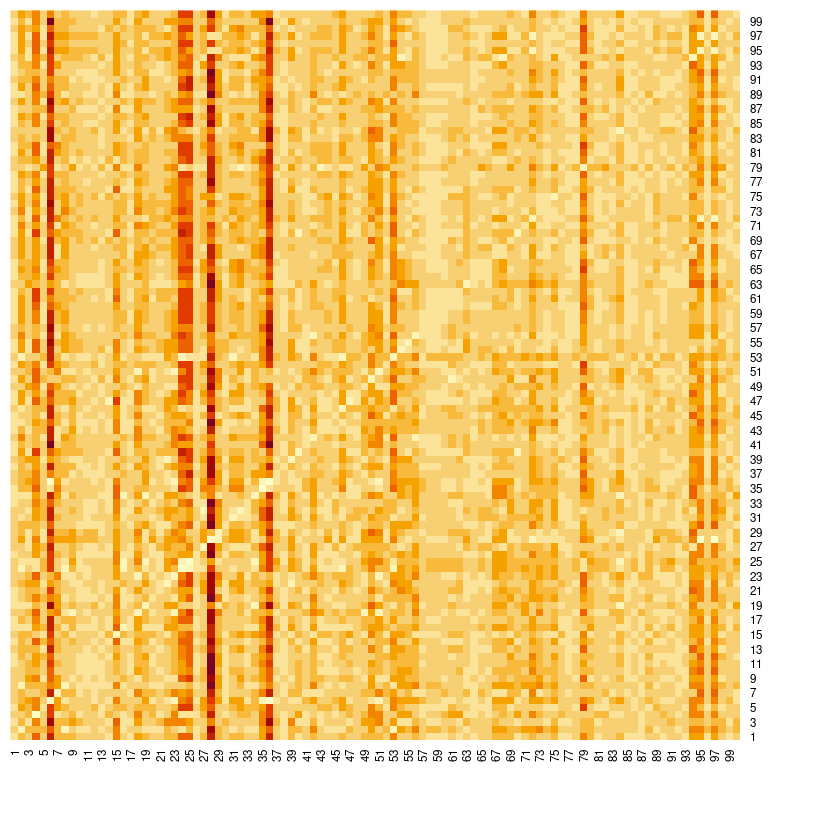

In [138]:
heatmap(snp_dist, Rowv = NA, Colv = NA)

In [139]:
#### ESTIMATE SIMILARITY GRAPHS
K     <- 20
alpha <- 0.5
W1 <- affinityMatrix(met_dist, K, alpha)
W2 <- affinityMatrix(snp_dist, K, alpha)

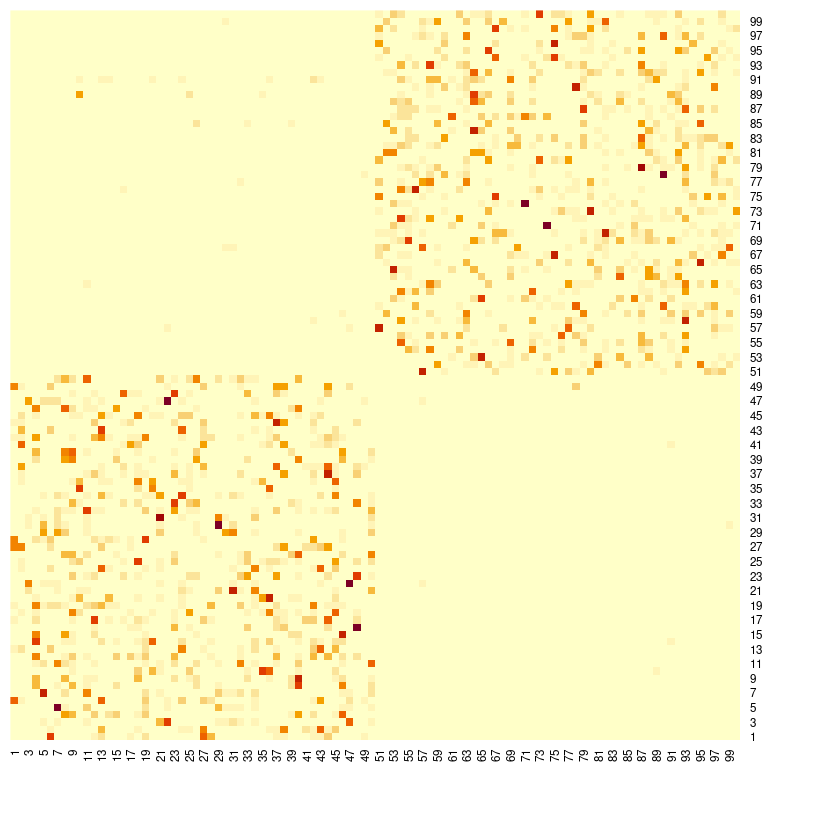

In [140]:
diag(W1) <- 0
heatmap(W1, Rowv = NA, Colv = NA)

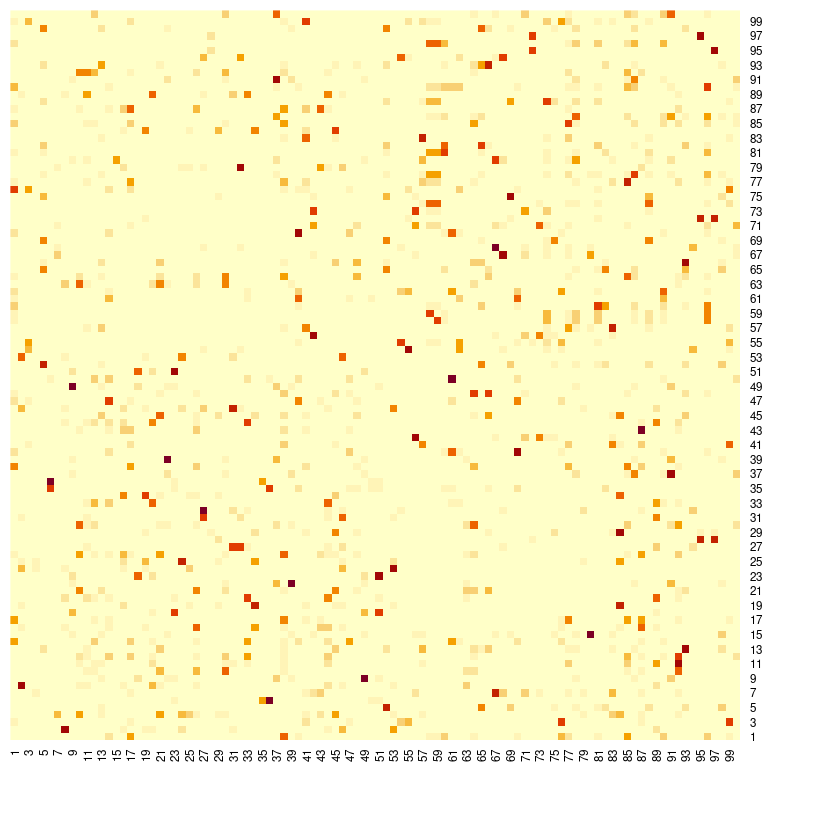

In [141]:
diag(W2) <- 0
heatmap(W2, Rowv = NA, Colv = NA)

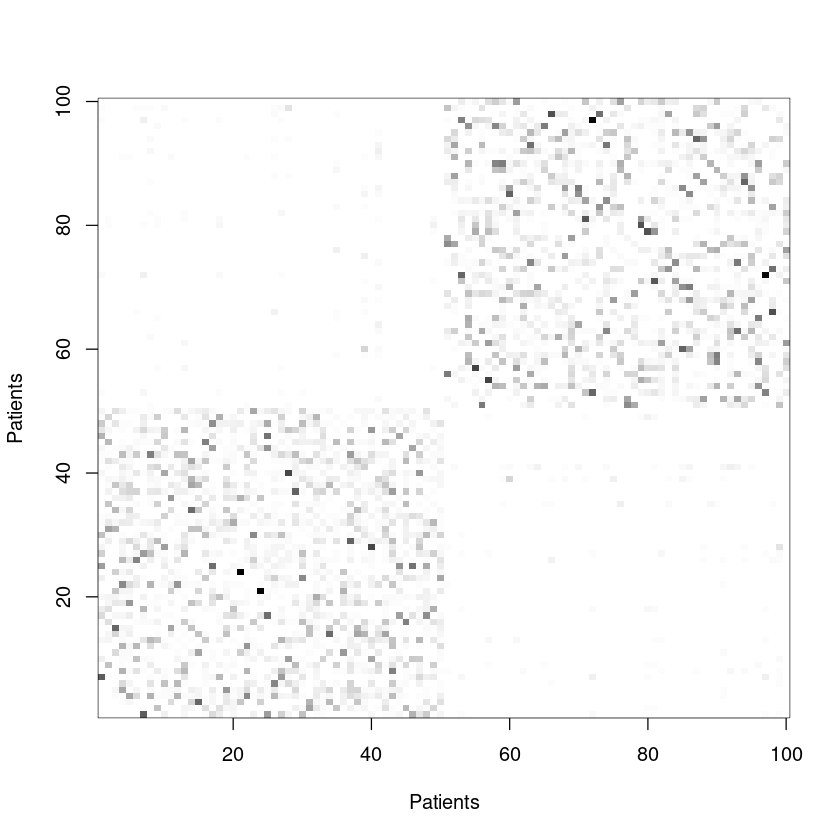

In [143]:
displayClusters(W1, dat$status)

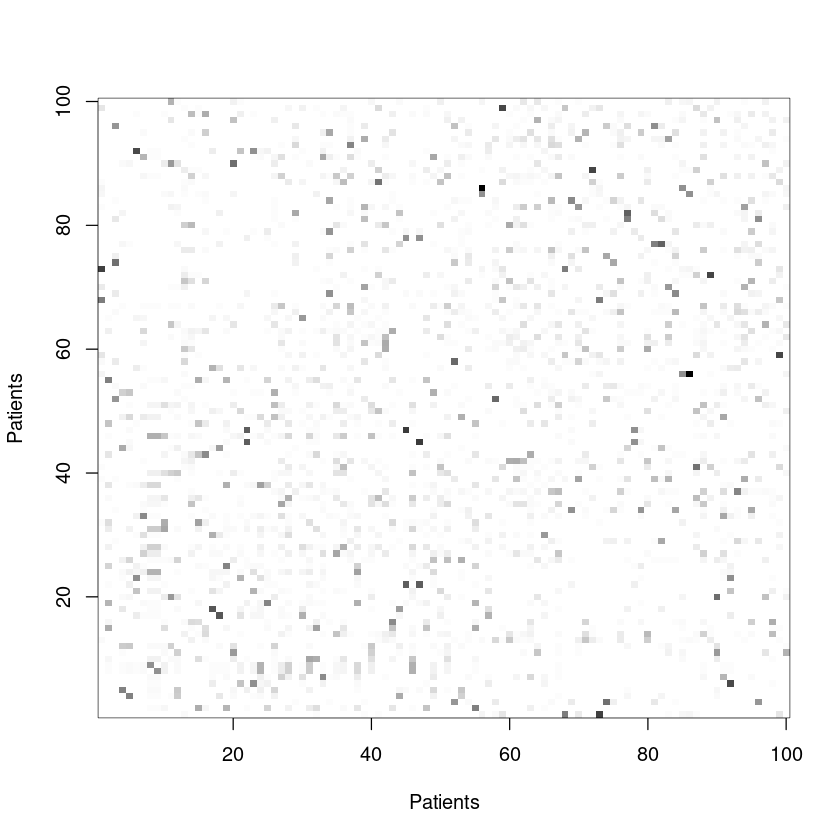

In [144]:
displayClusters(W2, dat$status)

In [145]:
#### RUN SNF
T <- 20
W <- SNF(list(W1,W2), K, T)

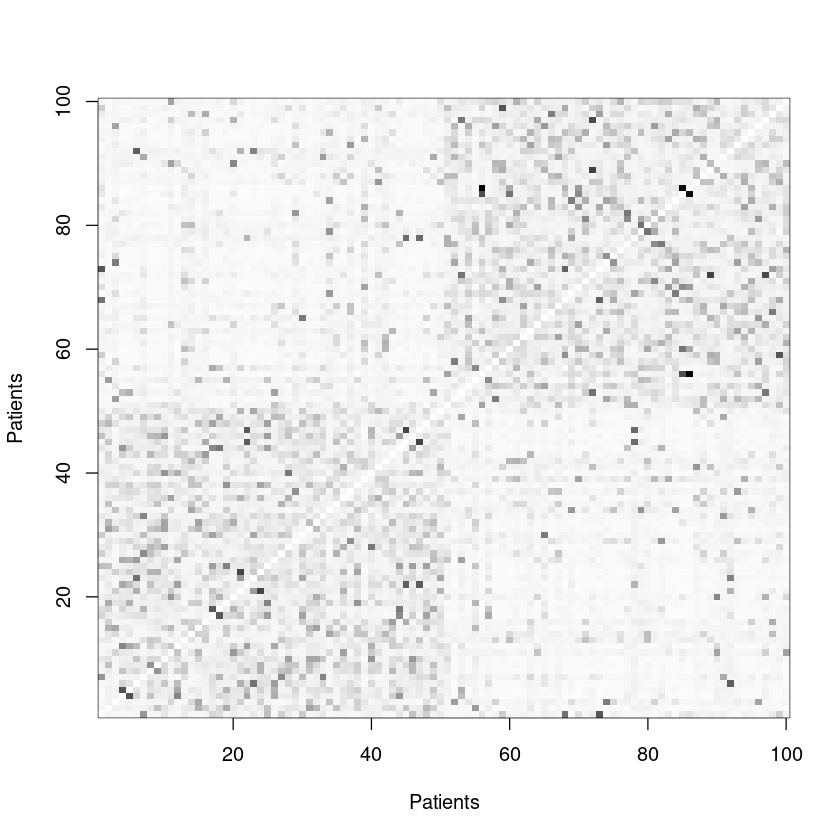

In [146]:
displayClusters(W, dat$status)

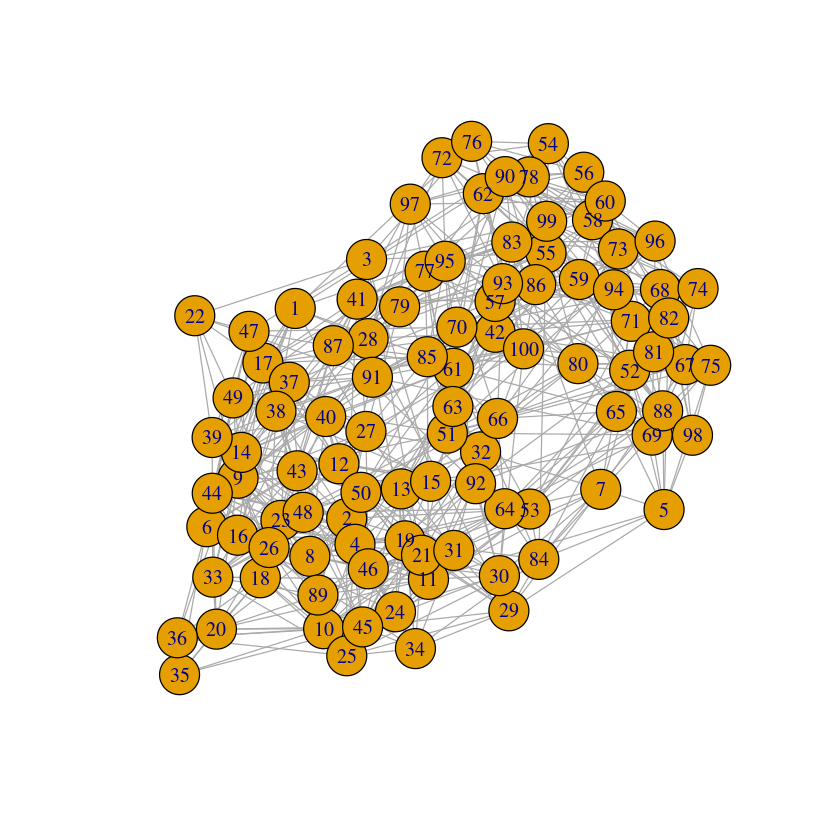

In [162]:
# Remove low weigths 
w3 <- W

w3[w3<9e-03] <- 0

# Plot networks
network3 <- graph_from_adjacency_matrix(w3, weighted = TRUE, mode = "undirected", diag = FALSE)

plot(network3)